# <center>Whatsapp Group Analysis</center>

Group used -- Portyyyy🥳🥳🥳 -- 3 members

First, export the chats of the group into a text file (saved as chat.txt locally).

## Importing required libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#to check if a string contains the specified pattern
import regex 
import re

#collection module provides different containers -> object used to store different objects and provide a way to access the contained objects and iterate over them
#to keep track of the elements in an iterable in the form of an unordered dictionary
#key->element in the iterable #value-> count of the key
from collections import Counter 

import emoji

#data visualization technique to represent text data in which the size of each word indicates its frequency
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from datetime import *
import datetime as dt

import plotly.express as px
from IPython.display import display
import seaborn as sns

#to hide the warning when datatype of date and time column is changed
import warnings
warnings.filterwarnings("ignore")

## Data Cleaning

### Defining functions to prepare the data

In [31]:
#extracting date and time of a msg
def get_date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

#extract username of author
def get_author(s):
    #s = s.split(":")
    if ":" in s:
        return True
    else:
        return False

#extracting date,time,author and msg from the chat
def getDatapoint(line):
    splitline = line.split(' - ')
    
    dateTime = splitline[0]
    date, time = dateTime.split(', ')
    
    message = " ".join(splitline[1:])
    
    if get_author(message):
        splitmessage = message.split(': ')
        author = splitmessage[0]
        message = ' '.join(splitmessage[1:])
    else:
        author= "NA"
    return date, time, author, message

## Preparing the data to use it in a Pandas Dataframe

In [32]:
#to keep track of the data
data = []

#uploading the chat file
with open('chat.txt', encoding="utf-8") as f:
    f.readline()
    messageBuffer = []
    date, time, author = None, None, "NA"
    
    while True:
        line = f.readline()
        if not line:
            break
        line = line.strip()
        
        if get_date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [33]:
df = pd.DataFrame(data, columns=["Date","Time","Author","Message"])

#changing the datatype of "Date" column
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Time,Author,Message
0,2021-08-05,8:36 pm,NA,"Aarthi Juluru NGIC created group ""POORRTYYY🎉🎉🎉"""
1,2021-08-05,8:36 pm,NA,Aarthi Juluru NGIC added you
2,2021-08-05,8:36 pm,Aarthi Juluru NGIC,Em movie chuddam
3,2021-08-05,8:36 pm,Aarthi Juluru NGIC,Arey Vincenzo isn't that great itseems re
4,2021-08-05,8:36 pm,Aarthi Juluru NGIC,My sis said that it's a bit cringey and boring...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3630 non-null   datetime64[ns]
 1   Time     3630 non-null   object        
 2   Author   3630 non-null   object        
 3   Message  3630 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 113.6+ KB


In [35]:
#identifying unique names
df.Author.unique()

array(['NA', 'Aarthi Juluru NGIC', 'Swetha', 'Botte Shreya NGIC',
       'Swetha:', 'Aarthi Juluru NGIC:'], dtype=object)

In [36]:
#dropping non-member and error in reading the name
index_names = df[ df['Author'] == "Aarthi Juluru NGIC:"].index 
df.drop(index_names, inplace = True)

index_names = df[ df['Author'] == "Swetha:"].index 
df.drop(index_names, inplace = True)

index_names = df[ df['Author'] == "NA"].index 
df.drop(index_names, inplace = True)

df = df.reset_index(drop=True)
authors = df.Author.unique()

In [37]:
df.head()

,Date,Time,Author,Message
0,2021-08-05,8:36 pm,Aarthi Juluru NGIC,Em movie chuddam
1,2021-08-05,8:36 pm,Aarthi Juluru NGIC,Arey Vincenzo isn't that great itseems re
2,2021-08-05,8:36 pm,Aarthi Juluru NGIC,My sis said that it's a bit cringey and boring...
3,2021-08-05,8:37 pm,Aarthi Juluru NGIC,"Btw porty means party, mr.nags uses it and mr...."
4,2021-08-05,8:37 pm,Aarthi Juluru NGIC,"Funny,,****"


In [38]:
#Adding the column Day
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

df['Day'] = df['Date'].dt.weekday.map(weeks)
#Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]

#Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')

#to extract the emojis used and store in a new column
def find_emoji(text):
    emojis = []
    txt = regex.findall(r'\X', text)
    for word in txt:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emojis.append(word)
    return emojis

df['emoji'] = df['Message'].apply(find_emoji)

#count of total emojis
emoji_count = sum(df['emoji'].str.len())

df.head()

,Date,Day,Time,Author,Message,emoji
0,2021-08-05,Thrusday,8:36 pm,Aarthi Juluru NGIC,Em movie chuddam,[]
1,2021-08-05,Thrusday,8:36 pm,Aarthi Juluru NGIC,Arey Vincenzo isn't that great itseems re,[]
2,2021-08-05,Thrusday,8:36 pm,Aarthi Juluru NGIC,My sis said that it's a bit cringey and boring...,[]
3,2021-08-05,Thrusday,8:37 pm,Aarthi Juluru NGIC,"Btw porty means party, mr.nags uses it and mr....",[❤️]
4,2021-08-05,Thrusday,8:37 pm,Aarthi Juluru NGIC,"Funny,,****",[]


In [40]:
#count number of links and make a new column
URLPATTERN = r'(https?://\S+)'
df['Url_Count'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
link_count = np.sum(df.Url_Count)

#count number of media and make a new column
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media_count = np.sum(df.Media_Count)

#count number of word in a single msg and make a new column
#will count even the no.of words in media ommited and msg deleted one
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))
words_count = np.sum(df.Word_Count)
df.head()

,Date,Day,Time,Author,Message,emoji,Url_Count,Media_Count,Word_count,Word_Count
0,2021-08-05,Thrusday,8:36 pm,Aarthi Juluru NGIC,Em movie chuddam,[],0,0,3,3
1,2021-08-05,Thrusday,8:36 pm,Aarthi Juluru NGIC,Arey Vincenzo isn't that great itseems re,[],0,0,7,7
2,2021-08-05,Thrusday,8:36 pm,Aarthi Juluru NGIC,My sis said that it's a bit cringey and boring...,[],0,0,12,12
3,2021-08-05,Thrusday,8:37 pm,Aarthi Juluru NGIC,"Btw porty means party, mr.nags uses it and mr....",[❤️],0,0,24,24
4,2021-08-05,Thrusday,8:37 pm,Aarthi Juluru NGIC,"Funny,,****",[],0,0,1,1


## Analysis of the data

In [ ]:
df_media = 
df_del = df[df['Message'] == 'This message was deleted']

### Group Stats

In [41]:
print("Group Stats:")
print("Total no.of Messages: ", df.shape[0])
print("Total no.of Media: ", media_count)
print("Total no.of Emojis: ",emoji_count)
print("Total no.of Links: ",link_count)
print("Total no.of Words: ", words_count)

Group Stats:
Total no.of Messages:  3613
Total no.of Media:  623
Total no.of Emojis:  1155
Total no.of Links:  4
Total no.of Words:  11043


### Stats of each member

--> Stats of Aarthi Juluru NGIC <-- 
Total Message Sent :  1772
Average Words per Message :  3.243
Total Media Message Sent :  270
Total Links Sent :  1
Total Emojis Sent :  635
Total Deleted Sent :  312


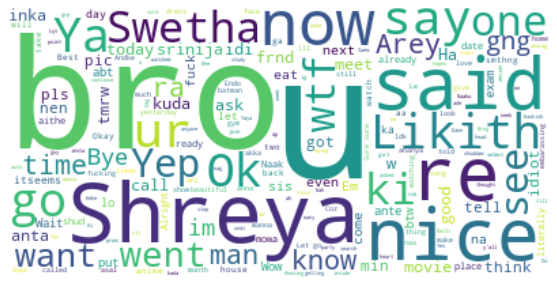


--> Stats of Swetha <-- 
Total Message Sent :  968
Average Words per Message :  3.663
Total Media Message Sent :  88
Total Links Sent :  2
Total Emojis Sent :  292
Total Deleted Sent :  0


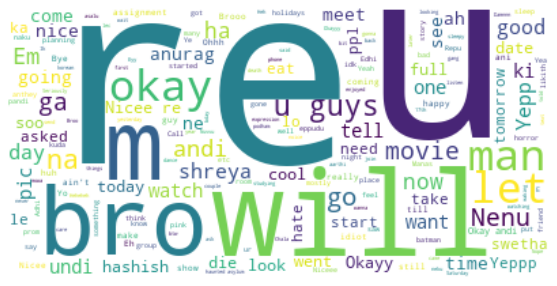


--> Stats of Botte Shreya NGIC <-- 
Total Message Sent :  873
Average Words per Message :  2.006
Total Media Message Sent :  265
Total Links Sent :  1
Total Emojis Sent :  228
Total Deleted Sent :  0


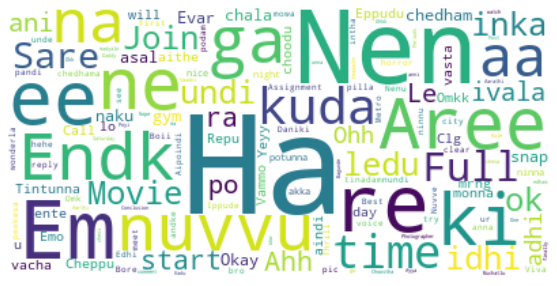

In [45]:
l = df.Author.unique()

for i in range(len(l)):
    #Filtering out messages of particular user
    req_df = df[df["Author"] == l[i]]
    df_media = req_df[req_df['Message'] == '<Media omitted>']
    df_del = req_df[req_df['Message'] == 'This message was deleted']
    df_text = req_df.drop(df_media.index).drop(df_del.index)
    
    print(f'--> Stats of {l[i]} <-- ')
    print('Total Message Sent : ', req_df.shape[0])
    
    avg_wpm = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Average Words per Message : ', round(avg_wpm,3))
    
    media = sum(req_df["Media_Count"])
    print('Total Media Message Sent : ', media)
    
    links = sum(req_df["Url_Count"])   
    print('Total Links Sent : ', links)   
    
    emojis = sum(req_df['emoji'].str.len())
    print('Total Emojis Sent : ', emojis) 
    
    del_msgs = sum(df_del['Message'].str.len())
    print('Total Deleted Sent : ', del_msgs) 
    
    #Visualizing using Word Cloud
    
    stopwords = set(STOPWORDS)
    stopwords.update(["https","Media omitted"])
    text = " ".join(x for x in df_text.Message)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    print()

## Distribution of msgs in a week

In [46]:
l = df.Day.unique()

for i in range(len(l)):
    req_df = df[df["Day"] == l[i]]
    print(l[i],'  ->  ',req_df.shape[0])

Thrusday   ->   565
Sunday   ->   769
Tuesday   ->   315
Friday   ->   316
Monday   ->   254
Wednesday   ->   300
Saturday   ->   1094


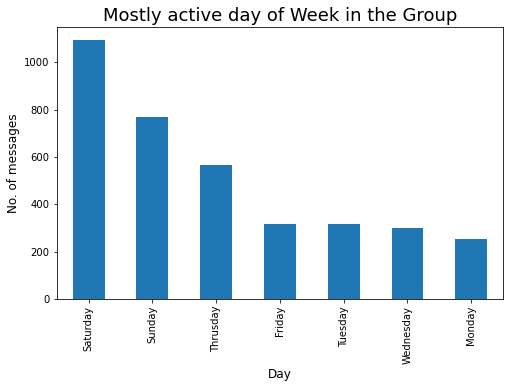

In [49]:
plt.figure(figsize=(8,5))

active_day = df['Day'].value_counts()
a_d = active_day.head(7)

a_d.plot.bar()

plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})

plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})

plt.show()

### Distribution of media among the members

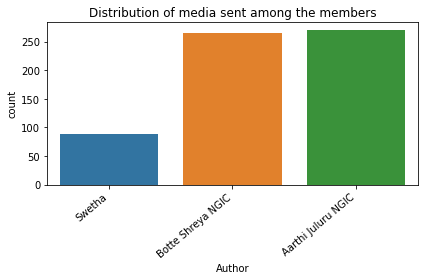

In [51]:
#collapse-hide
ax = sns.countplot(x='Author',data=df[df['Message']=="<Media omitted>"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Distribution of media sent among the members')
plt.tight_layout()
plt.show();

### Top 10 Emojis in group

In [16]:
emojis = [i for j in df.emoji for i in j]
emoji_dict = dict(Counter(emojis))
emoji_dict = sorted(emoji_dict.items(),key=lambda x:x[1],reverse=True)

df_emoji = pd.DataFrame(emoji_dict, columns=['emoji','emoji_count'])
print('Top 10 emojis in the group: ')
df_emoji.head(10).style.hide_index()

Top 10 emojis in the group: 


emoji,emoji_count
😂,400
🤣,179
😭,130
💀,105
🥲,63
🙂,38
🔥,32
😑,24
✊🏻,13
😒,11


In [54]:
fig = px.pie(df_emoji.head(10), values='emoji_count', names='emoji', title='Top 10 emojis in the group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Emoji Stats per member

In [53]:
for i in range(len(authors)):
    df_name = df[df['Author'] == authors[i]]
    emojis = [i for j in df_name.emoji for i in j]
    emoji_dict = dict(Counter(emojis))
    emoji_dict = sorted(emoji_dict.items(),key=lambda x:x[1],reverse=True)

    df_emoji_name = pd.DataFrame(emoji_dict, columns=['emoji','emoji_count'])
    df_emoji_name2 = df_emoji_name.head(10)
    #display(df_emoji_name2.style.hide_index())
    fig = px.pie(df_emoji_name2, values='emoji_count', names='emoji', title=f'Emoji distribution for {authors[i]}')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

### Analysis of group activeness based on time

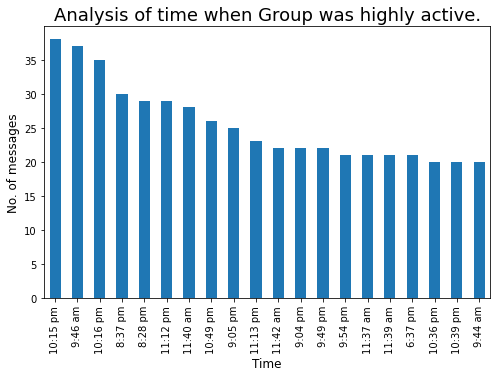

In [55]:
### Time whenever our group is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
#tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

### Distribution of msgs along Month

In [59]:
df['Year'] = df['Date'].dt.year
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)
df.drop('Mon',axis=1,inplace=True)

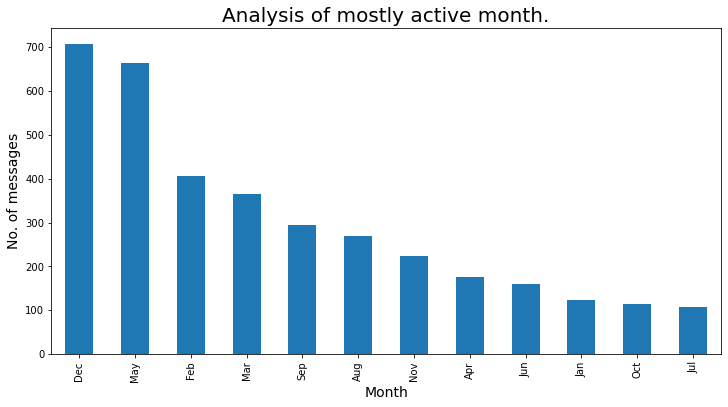

In [63]:
plt.figure(figsize=(12,6))
active_month = df['Month'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()

### Dates when our group is most active

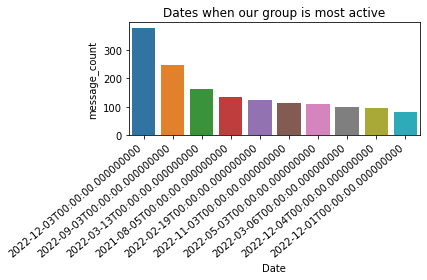

In [65]:
df_Date = df['Date'].value_counts()
dates = list(df_Date.index)
msg_count = df_Date.values
df_Date = pd.DataFrame({'Date':dates, 'message_count':msg_count})
ax = sns.barplot(x='Date',y='message_count',data=df_Date.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Dates when our group is most active')
plt.tight_layout()
plt.show()